In [ ]:
# Преоразовать существующий код для распознавания последовательности рукописных символов в текст.
# Написать генератор произвольной последовательности рукописных символов.

# ГЕНЕРАЦИЯ НАБОРА ДАННЫХ
# Сгенерировать набор текстовых строк из допустимых символов.
# Каждому набору поставить в соотвествие массив изоражений соответствующих символов.
# Добавить пробелы для разделения слов, символы пробелов не использовать во время классификации.

# КЛАССИФИКАЦИЯ (k ближайших соседей)
# Часть символов оставить для обучения классификатора . Остальные  классифицировать
# по аналогии с примером mnist с прошлого занятия. Т.е. преобразовывать изображение в вектор.
# Выбрать оптимальный классификатор в зависимости от k- количество соседей.
# Метрика для измерения точности классификации, и выбора оптимального классификатора относительно параметра k - accuracy.

# РАСПОЗНАВАНИЕ
# Итак, к данному этапу Вы из массива изображений "восстановили" текст.
# Случайно удалите некоторые символы,и случайно добавьте символы в результат распознавания.
# Рассчитайте метрику CER.

# Сгенерировать набор текстовых строк из допустимых символов.

In [70]:
import os
import random

symb_count = 15
img_count = 15

directory = 'data'
symb_list = list()


for dir_name in os.listdir(directory):
    symb_list.append(dir_name.replace('times', '*'))
print(f'Возможные символы: {symb_list}')

word_list = list()
for _ in range(0,img_count):
    current_word = ''
    for _ in range(0, symb_count):
        current_word = current_word + symb_list[random.randint(0,symb_list.__len__()-1)]
    word_list.append(current_word)

print(f'Слова: {word_list}')

Возможные символы: ['(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'h', 't', '*', 'w', 'X', 'y']
Слова: ['4,17+h3w-7h93th', '-t1899y-1h)((64', ',X6t66t1+w-(X5,', '1(2tt(40tt09+70', '(whX1994+8-1-1w', '7h,65+)1)t8(5y3', 'h*71070999(-y4,', '*3,X1)*)30t0t++', ',*0y,9,1,t8y++w', '19w,-t-)(++)t8)', '0-1(*y+tw*,-051', '7,5*6XXy3h578)7', 'w-533,+w8w7-,3-', '6)986*h6,188(1t', '*h)1(8-437t)),y']


Список массивов путей к изображениям [['data/4/4_53082.jpg', 'data/,/exp91834.jpg', 'data/1/1_53773.jpg', 'data/7/exp82514.jpg', 'data/+/exp9971.jpg', 'data/h/exp44520.jpg', 'data/3/exp38826.jpg', 'data/w/exp74964.jpg', 'data/-/-_107032.jpg', 'data/7/exp442.jpg', 'data/h/exp70867.jpg', 'data/9/9_17487.jpg', 'data/3/exp85743.jpg', 'data/t/t_50543.jpg', 'data/h/h_86360.jpg'], ['data/-/exp84373.jpg', 'data/t/exp38873.jpg', 'data/1/exp4598.jpg', 'data/8/exp68822.jpg', 'data/9/9_25194.jpg', 'data/9/9_51898.jpg', 'data/y/y_24912.jpg', 'data/-/exp88005.jpg', 'data/1/exp63764.jpg', 'data/h/exp35428.jpg', 'data/)/)_12769.jpg', 'data/(/(_29776.jpg', 'data/(/(_53790.jpg', 'data/6/exp35773.jpg', 'data/4/exp43347.jpg'], ['data/,/,_60729.jpg', 'data/X/exp75959.jpg', 'data/6/exp9900.jpg', 'data/t/t_3712.jpg', 'data/6/exp69758.jpg', 'data/6/6_81345.jpg', 'data/t/exp70658.jpg', 'data/1/exp56073.jpg', 'data/+/+_8336.jpg', 'data/w/exp86739.jpg', 'data/-/exp29054.jpg', 'data/(/exp2193.jpg', 'data/X/x_7269

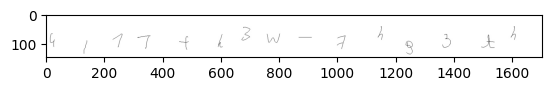

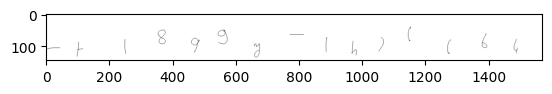

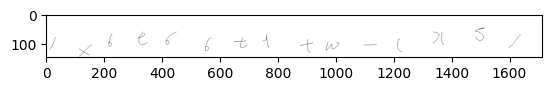

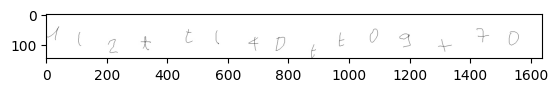

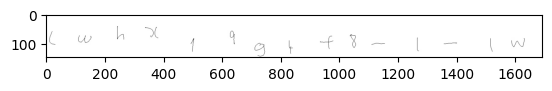

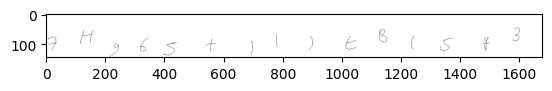

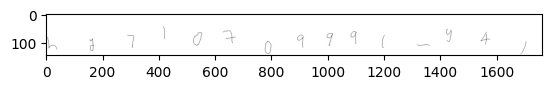

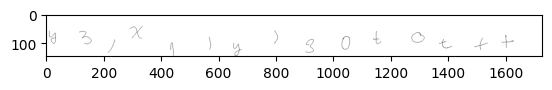

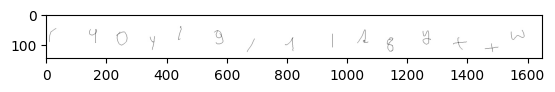

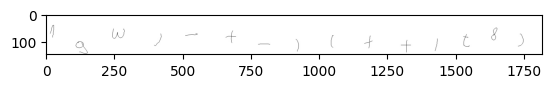

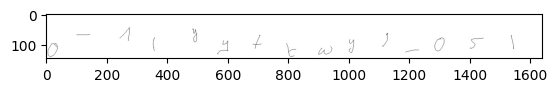

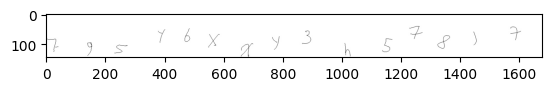

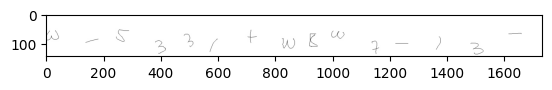

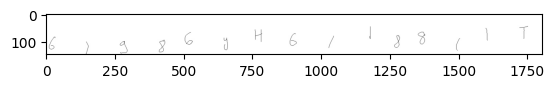

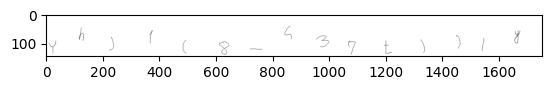

Список файлов с сгенерированными изображениями ['created_images/0.png', 'created_images/1.png', 'created_images/2.png', 'created_images/3.png', 'created_images/4.png', 'created_images/5.png', 'created_images/6.png', 'created_images/7.png', 'created_images/8.png', 'created_images/9.png', 'created_images/10.png', 'created_images/11.png', 'created_images/12.png', 'created_images/13.png', 'created_images/14.png']


In [73]:
import shutil
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt



#Чтобы каждый раз не считать количество изображений в каждой папке
symbol_count_img = {}
for symbol in symb_list:
    folder = directory + '/' + (symbol if symbol != '*' else 'times')

    symbol_count_img[symbol] = [folder+'/'+name for name in os.listdir(folder)]



word_list_directories = []

for word in word_list:
    
    path_to_files= []
    for symbol in word:

        file_index = random.randint(0,len(symbol_count_img[symbol])-1)
        folder = directory + '/' + (symbol if symbol != '*' else 'y')
        path_to_files.append(folder+ '/' +os.listdir(folder)[file_index])
    
    word_list_directories.append(path_to_files)
print(f'Список массивов путей к изображениям {word_list_directories}')


images_dir = 'created_images'
if os.path.isdir(images_dir):
    shutil.rmtree(images_dir)

os.mkdir(images_dir)



images_path = []
min_space_lenght = 40
max_space_lenght = 100


for i in range(0,len(word_list_directories)):
    images_list = []
    rand_spaces_lenght = []
    for path in word_list_directories[i]:
        rand_spaces_lenght.append(random.randint(min_space_lenght,max_space_lenght))
        img_temp = Image.open(path)
        images_list.append(img_temp)


    total_width = sum(img.width for img in images_list) + sum(rand_spaces_lenght)
    max_height = max(img.height for img in images_list) + max_space_lenght
    
    final_image = Image.new('RGB', (total_width, max_height), (255, 255, 255))
    insert_offset = 0
    
    
    for j in range(0,len(images_list)):
        final_image.paste(images_list[j],(insert_offset,random.randint(min_space_lenght, max_space_lenght)))
        insert_offset = insert_offset + images_list[j].width+ rand_spaces_lenght[j]
    
    
    image_path = images_dir+'/'+str(i)+'.png'
    final_image.save(image_path)
    images_path.append(image_path)
    imgplot = plt.imshow(final_image)
    plt.show()

print(f'Список файлов с сгенерированными изображениями {images_path}')


In [4]:
import cv2

def get_image_by_path(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    _, thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    

    
    if contours:
        x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
        return cv2.resize(img[y:y+h, x:x+w], (28, 28)).flatten()
    
    return None

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
X =[]
Y = []

for element in symbol_count_img:
    Y.extend([element]*len(symbol_count_img[element]))
    X.extend([get_image_by_path(symbol_count_img[element][i]) for i in range(0,len(symbol_count_img[element]))])
    
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(Y), test_size=0.1, random_state=42)
accuracy_scores = {}


for k in range(1, 5): 
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[k] = accuracy
    print(f"k={k}, accuracy={accuracy:.2f}")

max_k = max(accuracy_scores, key=accuracy_scores.get)



print(f"Оптимальное значение k: {max_k} с точностью {accuracy_scores[max_k]:.2f}")

k=1, accuracy=1.00
k=2, accuracy=0.98
k=3, accuracy=0.98
k=4, accuracy=0.92
Оптимальное значение k: 1 с точностью 1.00


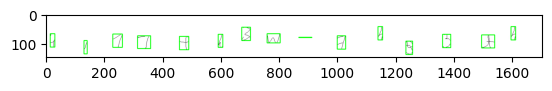

Исходная строка: ['4', ',', '1', '7', '+', 'h', '3', 'w', '-', '7', 'h', '9', '3', 't', 'h']. Предсказанная: ['4' ',' '1' '7' '+' 'h' '3' 'w' '-' '7' 'h' '9' '3' 't' 'h']. Accuracy: 1.0


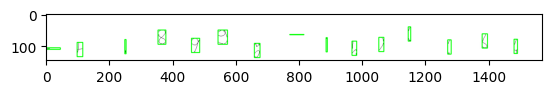

Исходная строка: ['-', 't', '1', '8', '9', '9', 'y', '-', '1', 'h', ')', '(', '(', '6', '4']. Предсказанная: ['-' 't' '1' '8' '9' '9' 'y' '-' '1' 'h' ')' '(' '(' '6' '4']. Accuracy: 1.0


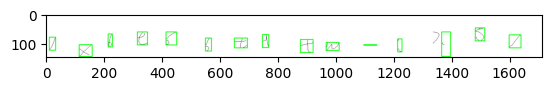

Исходная строка: [',', 'X', '6', 't', '6', '6', 't', '1', '+', 'w', '-', '(', 'X', '5', ',']. Предсказанная: [',' 'X' '6' 't' '6' '6' 't' '1' '+' 'w' '-' '(' '+' '5' ',']. Accuracy: 0.9333333333333333


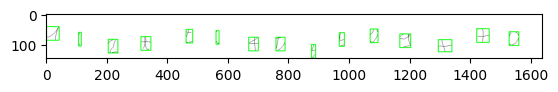

Исходная строка: ['1', '(', '2', 't', 't', '(', '4', '0', 't', 't', '0', '9', '+', '7', '0']. Предсказанная: ['1' '(' '2' 't' 't' '(' '4' '0' 't' 't' '0' '9' '+' '7' '0']. Accuracy: 1.0


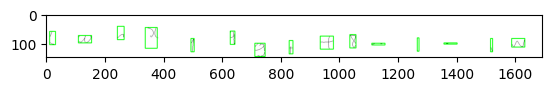

Исходная строка: ['(', 'w', 'h', 'X', '1', '9', '9', '4', '+', '8', '-', '1', '-', '1', 'w']. Предсказанная: ['(' 'w' 'h' 't' '1' '9' '9' '4' '+' '8' '-' '1' '-' '1' 'w']. Accuracy: 0.9333333333333333


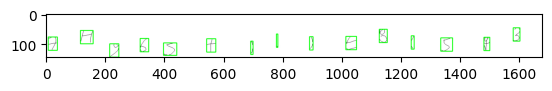

Исходная строка: ['7', 'h', ',', '6', '5', '+', ')', '1', ')', 't', '8', '(', '5', 'y', '3']. Предсказанная: ['7' 'h' ',' '6' '5' '+' ')' '1' ')' 't' '8' '(' '5' 'y' '3']. Accuracy: 1.0


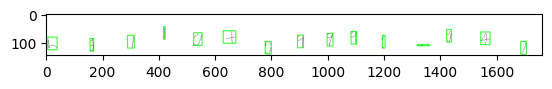

Исходная строка: ['h', '*', '7', '1', '0', '7', '0', '9', '9', '9', '(', '-', 'y', '4', ',']. Предсказанная: ['h' 'y' '7' '1' '0' '7' '0' '9' '9' '9' '(' '-' 'y' '4' ',']. Accuracy: 0.9333333333333333


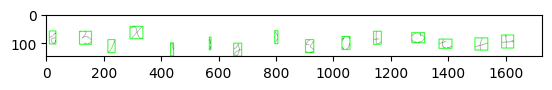

Исходная строка: ['*', '3', ',', 'X', '1', ')', '*', ')', '3', '0', 't', '0', 't', '+', '+']. Предсказанная: ['y' '3' ',' 'X' '1' ')' 'y' ')' '3' '0' 't' '0' 't' '+' '+']. Accuracy: 0.8666666666666667


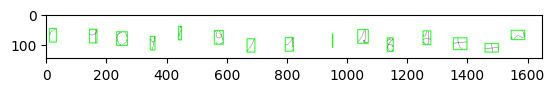

Исходная строка: [',', '*', '0', 'y', ',', '9', ',', '1', ',', 't', '8', 'y', '+', '+', 'w']. Предсказанная: [',' 'y' '0' 'y' ',' '9' ',' '1' '-' 't' '8' 'y' '+' '+' 'w']. Accuracy: 0.8666666666666667


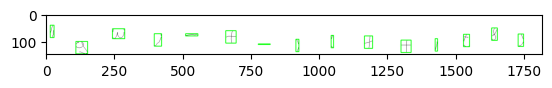

Исходная строка: ['1', '9', 'w', ',', '-', 't', '-', ')', '(', '+', '+', ')', 't', '8', ')']. Предсказанная: ['1' '9' 'w' ',' '-' 't' '-' ')' '(' '+' '+' ')' 't' '8' ')']. Accuracy: 1.0


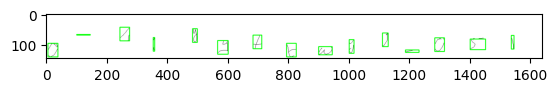

Исходная строка: ['0', '-', '1', '(', '*', 'y', '+', 't', 'w', '*', ',', '-', '0', '5', '1']. Предсказанная: ['0' '-' '1' '(' 'y' 'y' '+' 't' 'w' 'y' ',' '-' '0' '+' '1']. Accuracy: 0.8


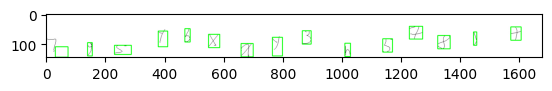

Исходная строка: ['7', ',', '5', '*', '6', 'X', 'X', 'y', '3', 'h', '5', '7', '8', ')', '7']. Предсказанная: ['+' ',' '+' '+' '6' 'X' 'X' '+' '3' 'h' '5' '7' '8' ')' '7']. Accuracy: 0.7333333333333333


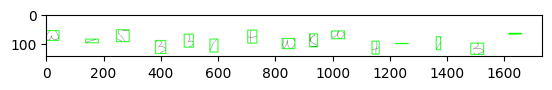

Исходная строка: ['w', '-', '5', '3', '3', ',', '+', 'w', '8', 'w', '7', '-', ',', '3', '-']. Предсказанная: ['w' '-' '5' '3' '3' ',' '+' 'w' '8' 'w' '7' '-' ',' '3' '-']. Accuracy: 1.0


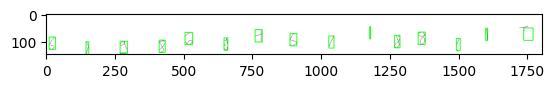

Исходная строка: ['6', ')', '9', '8', '6', '*', 'h', '6', ',', '1', '8', '8', '(', '1', 't']. Предсказанная: ['6' ')' '5' '8' '6' 'y' 'h' '6' ',' '1' '8' '8' '(' '1' '+']. Accuracy: 0.8


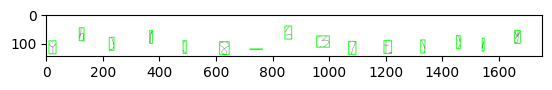

Исходная строка: ['*', 'h', ')', '1', '(', '8', '-', '4', '3', '7', 't', ')', ')', ',', 'y']. Предсказанная: ['y' 'h' ')' '1' '(' '8' '-' '4' '3' '7' 't' ')' ')' ',' 'y']. Accuracy: 0.9333333333333333


In [79]:
#распознавание символов на изображении
best_knn_model= KNeighborsClassifier(n_neighbors=max_k)
best_knn_model.fit(X_train, y_train)


accuracies = []
for i in range(0,len(images_path)):
    
    img = cv2.imread(images_path[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    list_contour = list()
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        to_append_dict = {
            'x' : x,
            'y' : y,
            'w' : w,
            'h' : h
        }
        list_contour.append(to_append_dict)
    
    
    anyupdated = True
    while anyupdated:
        anyupdated = False
        
        for j in range(0,len(list_contour)):
            
            for n in range (j+1, len(list_contour)):
                difference_x = list_contour[n]['x'] - list_contour[j]['x']
                
                
                if abs(difference_x) < min_space_lenght:
                    anyupdated = True
                    list_contour[j]['w'] = list_contour[j]['w'] + list_contour[n]['w']
                    list_contour[j]['h'] = list_contour[j]['h'] + list_contour[n]['h']
                    list_contour.pop(n)
                    break
    
    
    list_contour = sorted(list_contour, key=lambda x: x['x'])
    symbols_finded = []
    
    for cont in list_contour:
        height, width, _ = img.shape
        
        x = max(0, min(cont['x'], width))
        y = max(0, min(cont['y'], height))
        w = min(cont['w'], width - x)
        h = min(cont['h'], height - y)
        
        temp_img = gray[y:y+h, x:x+w]
        #resize для одинакового размера изображений для predict
        to_reshape = cv2.resize(temp_img,(28,28))
        cropped = to_reshape.flatten()
        symbols_finded.append(cropped)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    
    plt.imshow(img)
    plt.show()
    
    
    if len(list(word_list[i]))==len(symbols_finded):
        predictions = best_knn_model.predict(symbols_finded)
        accuracy = accuracy_score(list(word_list[i]),predictions)
        print(f'Исходная строка: {list(word_list[i])}. Предсказанная: {predictions}. Accuracy: {accuracy}')
        accuracies.append((list(word_list[i]),predictions,accuracy))
    else:
        print(f'Некорректно определено количество символов')        

In [86]:
sum = sum(float(acc[2]) for acc in accuracies)
print(f'Средняя accuracy:{sum/len(accuracies)}')

Средняя accuracy:0.92


In [95]:
# Случайно удалите некоторые символы,и случайно добавьте символы в результат распознавания.
# Рассчитайте метрику CER.
import editdistance

for acc in accuracies:
    word_in = ''.join(acc[0])
    recognized_word = ''.join(acc[1])
    number_to_replace = random.randint(0,symb_count)
    replaced_recognized_text = recognized_word[:]



    for i in range(number_to_replace):
        new_symbol_index = random.randint(0,len(symb_list)-1)
        new_symbol = symb_list[new_symbol_index]
        replaced_recognized_text = replaced_recognized_text[:new_symbol_index] + new_symbol + replaced_recognized_text[new_symbol_index+1:]
    
    
    distance = editdistance.eval(word_in,replaced_recognized_text)
    
    cer = distance/symb_count
    print(f'Исходное слово {word_in}, распознанное слово {recognized_word}, с заменнными буквами {replaced_recognized_text}, CER {cer}')
    

Исходное слово 4,17+h3w-7h93th, распознанное слово 4,17+h3w-7h93th, с заменнными буквами 4,+7+h3w-7h97thw, CER 0.2
Исходное слово -t1899y-1h)((64, распознанное слово -t1899y-1h)((64, с заменнными буквами (t+899y23h56789t, CER 0.6666666666666666
Исходное слово ,X6t66t1+w-(X5,, распознанное слово ,X6t66t1+w-(+5,, с заменнными буквами ,X6t6011345(+8,h, CER 0.5333333333333333
Исходное слово 1(2tt(40tt09+70, распознанное слово 1(2tt(40tt09+70, с заменнными буквами 1(2tt(40tt09+70, CER 0.0
Исходное слово (whX1994+8-1-1w, распознанное слово (wht1994+8-1-1w, с заменнными буквами ()+,-99238-1-1wht, CER 0.5333333333333333
Исходное слово 7h,65+)1)t8(5y3, распознанное слово 7h,65+)1)t8(5y3, с заменнными буквами 7h+6-+11)t8(7y3t*w, CER 0.4666666666666667
Исходное слово h*71070999(-y4,, распознанное слово hy71070999(-y4,, с заменнными буквами ()71-719395-y89hw*, CER 0.7333333333333333
Исходное слово *3,X1)*)30t0t++, распознанное слово y3,X1)y)30t0t++, с заменнными буквами y3,X1)1)30t0t++, CER 0.1333